In [5]:
from typing import TypedDict
from langgraph.graph import StateGraph
from IPython.display import Image, display
import math

In [6]:
class AgentState(TypedDict):
    name: str
    values: list
    result: str
    operation: str

In [14]:
def perform_operation(state: AgentState) -> AgentState:
    operation = state.get('operation', "+")
    total = 0

    if operation == "*":
        total = math.prod(state['values'])
        state['result'] = f"Hi {state['name']}, result after multiplying your values is {total}"
        return state

    total = sum(state['values'])
    state["result"] = (
        f"Hi {state['name']}, result after adding your values is {total}"
    )
    return state

In [15]:
graph = StateGraph(AgentState)

graph.add_node("listOperator", perform_operation)

graph.set_entry_point("listOperator")
graph.set_finish_point("listOperator")

app = graph.compile()

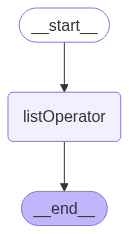

In [16]:
display(Image(app.get_graph().draw_mermaid_png()))

In [19]:
result = app.invoke({ 'name': "DJ", 'values': [1, 2, 3, 4, 5], 'operation': "*"})
print(result["result"])

Hi DJ, result after multiplying your values is 120
